# Recommendation engine

# Step 1: Mining Association Rules Between Movies

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('movie_revenue_new_by_day_and_platform.csv').dropna()

In [6]:
list(df.columns)

['Movie_id',
 'Mama_id',
 'Title',
 'Country_of_origin',
 'Country_of_market',
 'Royalties',
 'Date',
 'Source']

### Check movies by 'Mama_id'

In [251]:
df[df['Mama_id']==32667]

,Movie_id,Mama_id,Title,Country_of_origin,Country_of_market,Royalties,Date,Source,source_country
2156906,3208,32667,Kung Fury,SE,Argentina,7.0,2015-06-03,itunes,itunes Argentina
2156907,3208,32667,Kung Fury,SE,Argentina,3.5,2015-06-06,itunes,itunes Argentina
2156908,3208,32667,Kung Fury,SE,Argentina,3.5,2015-07-22,itunes,itunes Argentina
2156909,3208,32667,Kung Fury,SE,Argentina,3.5,2015-07-25,itunes,itunes Argentina
2156910,3208,32667,Kung Fury,SE,Argentina,2.1,2016-01-03,itunes,itunes Argentina
...,...,...,...,...,...,...,...,...,...
2165234,3208,32667,Kung Fury,SE,United States,24.5,2020-02-21,itunes,itunes United States
2165235,3208,32667,Kung Fury,SE,United States,31.5,2020-02-22,itunes,itunes United States
2165236,3208,32667,Kung Fury,SE,United States,17.5,2020-02-23,itunes,itunes United States
2165237,3208,32667,Kung Fury,SE,United States,7.0,2020-02-24,itunes,itunes United States


### Getting all client sources

In [11]:
sources = list(df['Source'].unique())

In [18]:
print(sources)
print('________')
print('Number of client sources:')
print(len(sources))

['itunes', 'google', 'sony', 'amazon', 'vudu', 'rakuten', 'microsoft', 'vubiquity', 'hoopla', 'kanopy', 'vimeo', 'indemand', 'teleclub', 'orange', 'filmin', 'arte', 'pantaflix', 'eurocinema', 'tv5', 'mytf1', 'vod factory', 'canal vod', 'movistar', 'universciné', 'flimmit', 'huawei', 'sky', 'klic', 'curzon', 'proximus', 'universcine']
________
Number of client sources:
31


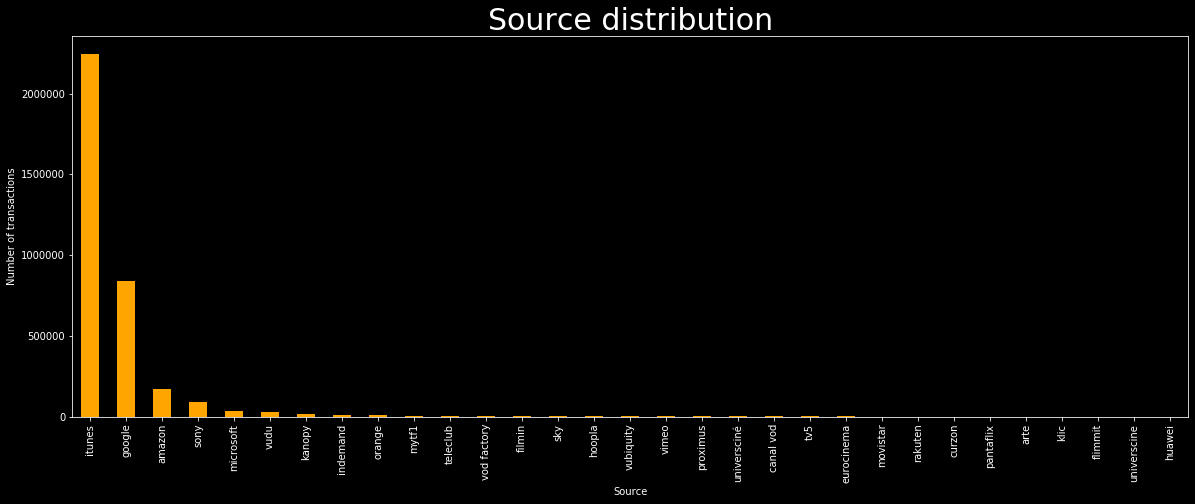

In [42]:
plt.style.use('dark_background')
df['Source'].value_counts().head(40).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Source distribution', fontsize = 30, fontweight = 20)
plt.xlabel('Source')
plt.ylabel('Number of transactions')
plt.show()

### Getting all countries of market

In [19]:
countries = list(df['Country_of_market'].unique())

In [21]:
print(countries)
print('________')
print('Number of client countries:')
print(len(countries))

['France', 'Switzerland', 'Argentina', 'Australia', 'Belgium', 'Brazil', 'Brunei Darussalam', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'Guatemala', 'Hong Kong', 'Indonesia', 'Ireland', 'Luxembourg', 'Macao', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Singapore', 'Spain', 'Sri Lanka', 'Taiwan, Province of China', 'Thailand', 'United Kingdom', 'United States', 'Viet Nam', 'El Salvador', 'Hungary', 'Israel', 'Poland', 'Slovakia', 'Denmark', 'Finland', 'Italy', 'Norway', 'Sweden', 'Austria', 'Cambodia', 'Germany', 'Honduras', 'Venezuela, Bolivarian Republic of', 'Portugal', 'Nicaragua', 'Belarus', 'Bulgaria', 'Mozambique', 'South Africa', 'Bolivia, Plurinational State of', 'Bermuda', 'Cyprus', 'Estonia', 'Greece', 'Slovenia', 'Japan', 'Czech Republic', 'Lithuania', 'Malta', 'Turkey', 'Armenia', 'Mauritius', 'Latvia', "Lao People's Democratic Republic", 'Russian Federation', 'Azerbaijan', 'Namibia', 

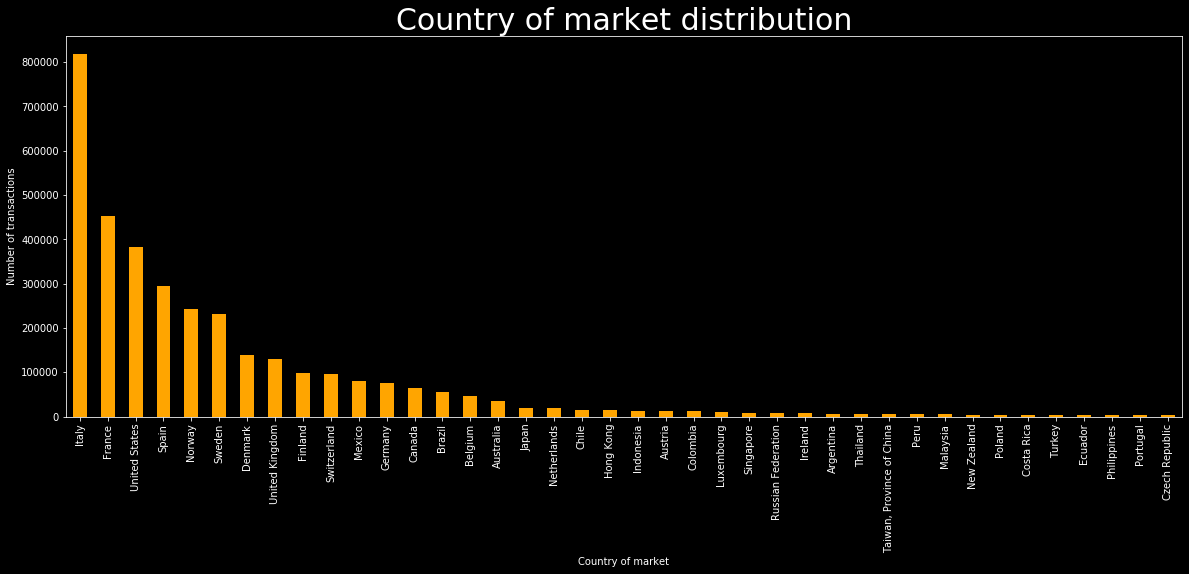

In [40]:
plt.style.use('dark_background')
df['Country_of_market'].value_counts().head(40).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Country of market distribution', fontsize = 30, fontweight = 20)
plt.xlabel('Country of market')
plt.ylabel('Number of transactions')
plt.show()

### Creating source_country column

In [23]:
df['source_country'] = df[['Source', 'Country_of_market']].apply(lambda x: ' '.join(x), axis=1)

In [151]:
source_country = list(df['source_country'].unique())

In [27]:
print(source_country)
print('________')
print('Number of platforms - or source_country:')
print(len(source_country))

['itunes France', 'google France', 'itunes Switzerland', 'itunes Argentina', 'itunes Australia', 'google Australia', 'itunes Belgium', 'google Belgium', 'itunes Brazil', 'itunes Brunei Darussalam', 'itunes Canada', 'google Canada', 'itunes Chile', 'itunes Colombia', 'itunes Costa Rica', 'itunes Dominican Republic', 'itunes Ecuador', 'itunes Guatemala', 'itunes Hong Kong', 'google Hong Kong', 'itunes Indonesia', 'itunes Ireland', 'google Ireland', 'itunes Luxembourg', 'google Luxembourg', 'itunes Macao', 'itunes Malaysia', 'itunes Mexico', 'google Mexico', 'google Netherlands', 'itunes New Zealand', 'itunes Panama', 'itunes Paraguay', 'itunes Peru', 'itunes Philippines', 'itunes Singapore', 'itunes Spain', 'google Spain', 'itunes Sri Lanka', 'google Switzerland', 'itunes Taiwan, Province of China', 'google Taiwan, Province of China', 'itunes Thailand', 'itunes United Kingdom', 'google United Kingdom', 'itunes United States', 'google United States', 'itunes Viet Nam', 'itunes El Salvador

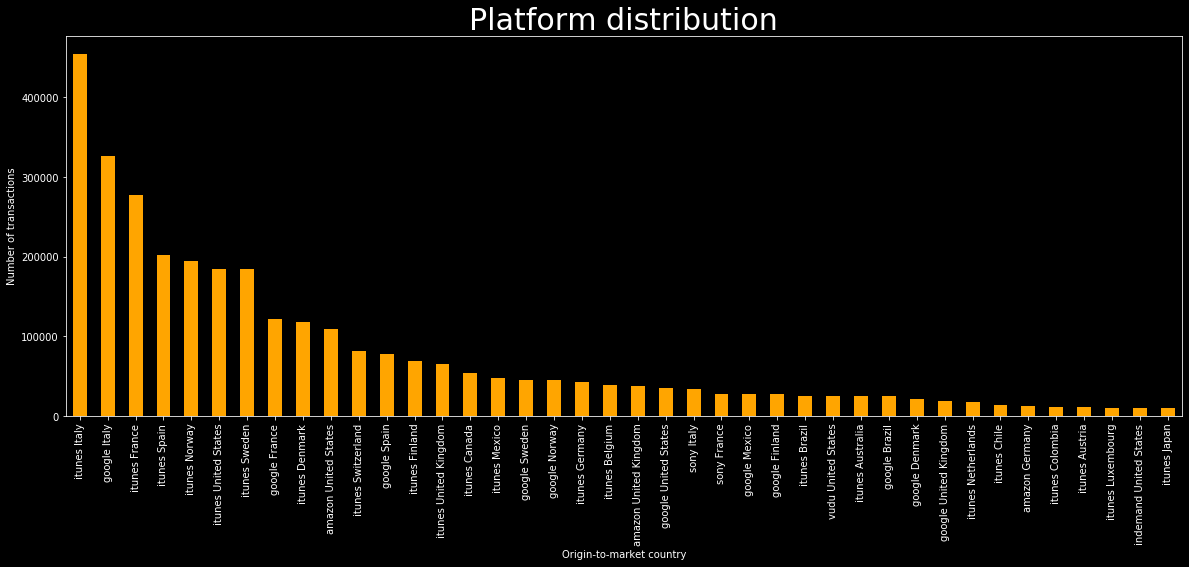

In [130]:
plt.style.use('dark_background')
df['source_country'].value_counts().head(40).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Platform distribution', fontsize = 30, fontweight = 20)
plt.xlabel('Origin-to-market country')
plt.ylabel('Number of transactions')
plt.show()

### Creating origin_to_market country column

In [30]:
df['origin_to_market'] = df[['Country_of_origin', 'Country_of_market']].apply(lambda x: ' to '.join(x), axis=1)

In [152]:
origin_to_market = list(df['origin_to_market'].unique())

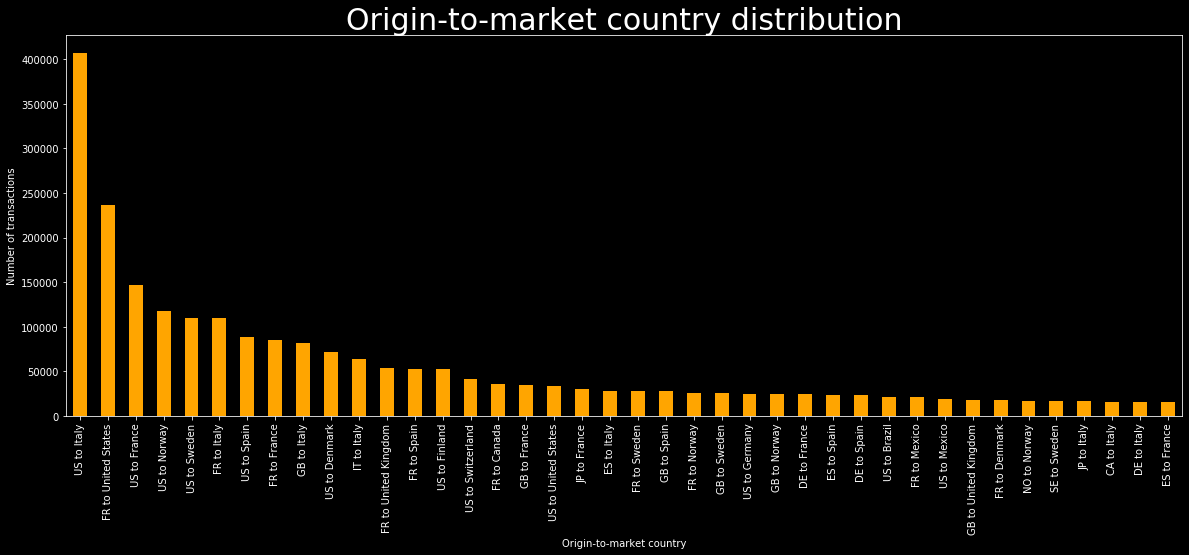

In [35]:
plt.style.use('dark_background')
df['origin_to_market'].value_counts().head(40).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Origin-to-market country distribution', fontsize = 30, fontweight = 20)
plt.xlabel('Origin-to-market country')
plt.ylabel('Number of transactions')
plt.show()

In [153]:
print(origin_to_market)
print('________')
print('Number of platforms - or source_country:')
print(len(origin_to_market))

['US to France', 'US to Switzerland', 'BE to Argentina', 'BE to Australia', 'BE to Belgium', 'BE to Brazil', 'BE to Brunei Darussalam', 'BE to Canada', 'BE to Chile', 'BE to Colombia', 'BE to Costa Rica', 'BE to Dominican Republic', 'BE to Ecuador', 'BE to France', 'BE to Guatemala', 'BE to Hong Kong', 'BE to Indonesia', 'BE to Ireland', 'BE to Luxembourg', 'BE to Macao', 'BE to Malaysia', 'BE to Mexico', 'BE to Netherlands', 'BE to New Zealand', 'BE to Panama', 'BE to Paraguay', 'BE to Peru', 'BE to Philippines', 'BE to Singapore', 'BE to Spain', 'BE to Sri Lanka', 'BE to Switzerland', 'BE to Taiwan, Province of China', 'BE to Thailand', 'BE to United Kingdom', 'BE to United States', 'BE to Viet Nam', 'FR to Belgium', 'FR to Canada', 'FR to France', 'FR to Luxembourg', 'FR to Switzerland', 'ES to Argentina', 'ES to Belgium', 'ES to Chile', 'ES to Colombia', 'ES to El Salvador', 'ES to France', 'ES to Guatemala', 'ES to Mexico', 'ES to Panama', 'ES to Peru', 'ES to Spain', 'ES to Switz

In [107]:
len(df.origin_to_market.unique())

2556

Given the large number of long-tail otm, let's limit our otm to the top 100 otm in terms of numbers of transactions. This will help unbiasing further metrics.

Take a look at this peculiar, yet beautiful tail.

In [165]:
df['origin_to_market'].value_counts().tail(30)

PR to Thailand                           1
PR to Luxembourg                         1
BR to Latvia                             1
BR to Macao                              1
LU to Mauritius                          1
PT to Malta                              1
LV to Latvia                             1
GR to Philippines                        1
NG to Greece                             1
GR to Poland                             1
SK to Argentina                          1
GB to Cambodia                           1
ES to Azerbaijan                         1
AR to Sri Lanka                          1
PR to Portugal                           1
GR to Slovenia                           1
IS to Bolivia, Plurinational State of    1
TT to Australia                          1
CH to Bermuda                            1
IN to Mozambique                         1
HU to Switzerland                        1
PL to Greece                             1
LT to Peru                               1
SG to Sri L

In [160]:
reduced_otm = df['origin_to_market'].value_counts().head(100)
reduced_otm = reduced_otm.index.values.tolist()

### Constructing four portfolio categories
- s_portfolio : movie portfolio by Source
- c_portfolio : movie portfolio by Country_of_market
- sc_portfolio : movie portfolio by source_country
- otm_portfolio : movie portfolio by origin_to_market 

In [44]:
s_portfolio = df.groupby(['Source'])['Mama_id'].unique()

In [52]:
print(s_portfolio)

Source
amazon         [18, 111, 132, 196, 398, 402, 404, 405, 407, 4...
arte                                               [1132, 12374]
canal vod                            [1799, 35804, 35819, 37272]
curzon                                                   [33127]
eurocinema                                          [1259, 2544]
filmin         [1001, 1173, 1638, 32242, 32243, 32267, 32270,...
flimmit               [32268, 32270, 32271, 32361, 32521, 34286]
google         [3, 7, 10, 15, 16, 17, 18, 19, 20, 21, 22, 24,...
hoopla         [453, 481, 483, 484, 487, 534, 535, 538, 539, ...
huawei                                            [32331, 38178]
indemand       [481, 483, 484, 535, 538, 539, 543, 545, 550, ...
itunes         [1, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17,...
kanopy         [481, 483, 538, 539, 544, 557, 560, 579, 1259,...
klic           [32934, 37721, 38494, 38496, 38497, 41635, 432...
microsoft      [86, 277, 435, 441, 445, 456, 660, 748, 759, 9...
movistar          

In [53]:
c_portfolio = df.groupby(['Country_of_market'])['Mama_id'].unique()

In [54]:
print(c_portfolio)

Country_of_market
Argentina                            [7, 9, 35, 41, 42, 99, 107, 108, 196, 369, 383...
Armenia                              [487, 1174, 1551, 1701, 2024, 2526, 32648, 361...
Australia                            [7, 10, 35, 36, 41, 42, 70, 107, 109, 111, 255...
Austria                              [35, 36, 70, 100, 196, 385, 388, 396, 400, 402...
Azerbaijan                           [1287, 1288, 1459, 1740, 1741, 1742, 1810, 196...
                                                           ...                        
United States                        [7, 10, 18, 35, 36, 41, 42, 70, 100, 107, 109,...
Venezuela, Bolivarian Republic of    [35, 99, 107, 108, 369, 453, 487, 575, 762, 97...
Viet Nam                             [7, 35, 36, 39, 75, 76, 77, 78, 79, 107, 268, ...
Virgin Islands, British                                           [2438, 32445, 33172]
Zimbabwe                                                           [1551, 2094, 31706]
Name: Mama_id, Length: 96

In [28]:
sc_portfolio = df.groupby(['source_country'])['Mama_id'].unique()

In [29]:
print(sc_portfolio)

source_country
amazon Germany             [196, 453, 456, 565, 660, 818, 997, 1132, 1173...
amazon Japan               [1810, 1859, 2024, 2494, 32140, 32154, 32445, ...
amazon United Kingdom      [18, 111, 453, 461, 484, 487, 494, 534, 535, 5...
amazon United States       [18, 111, 132, 196, 398, 402, 404, 405, 407, 4...
arte France                                                    [1132, 12374]
                                                 ...                        
vimeo United States        [481, 483, 534, 535, 538, 539, 543, 545, 557, ...
vod factory France         [1799, 2475, 32406, 33098, 33099, 33216, 33220...
vubiquity United States    [453, 484, 487, 536, 537, 538, 542, 545, 546, ...
vudu Mexico                [107, 108, 374, 487, 762, 979, 980, 1189, 1209...
vudu United States         [42, 100, 107, 132, 196, 404, 405, 407, 453, 4...
Name: Mama_id, Length: 260, dtype: object


In [161]:
reduced_otm

['US to Italy',
 'FR to United States',
 'US to France',
 'US to Norway',
 'US to Sweden',
 'FR to Italy',
 'US to Spain',
 'FR to France',
 'GB to Italy',
 'US to Denmark',
 'IT to Italy',
 'FR to United Kingdom',
 'FR to Spain',
 'US to Finland',
 'US to Switzerland',
 'FR to Canada',
 'GB to France',
 'US to United States',
 'JP to France',
 'ES to Italy',
 'FR to Sweden',
 'GB to Spain',
 'FR to Norway',
 'GB to Sweden',
 'US to Germany',
 'GB to Norway',
 'DE to France',
 'ES to Spain',
 'DE to Spain',
 'US to Brazil',
 'FR to Mexico',
 'US to Mexico',
 'GB to United Kingdom',
 'FR to Denmark',
 'NO to Norway',
 'SE to Sweden',
 'JP to Italy',
 'CA to Italy',
 'DE to Italy',
 'ES to France',
 'US to Belgium',
 'SE to United States',
 'GB to Denmark',
 'CA to France',
 'US to United Kingdom',
 'GB to United States',
 'FR to Brazil',
 'FR to Australia',
 'CA to Spain',
 'DE to Germany',
 'GB to Finland',
 'US to Indonesia',
 'IL to France',
 'FR to Finland',
 'AU to Italy',
 'FR to 

In [169]:
df_reduced_otm = df[df.origin_to_market.isin(reduced_otm)]

In [170]:
df_reduced_otm

,Movie_id,Mama_id,Title,Country_of_origin,Country_of_market,Royalties,Date,Source,source_country,origin_to_market
3183,2,1,The Spanish Prisoner,US,France,20.20,2011-08-15,itunes,itunes France,US to France
3184,2,1,The Spanish Prisoner,US,France,20.20,2011-08-16,itunes,itunes France,US to France
3185,2,1,The Spanish Prisoner,US,France,12.70,2011-08-17,itunes,itunes France,US to France
3186,2,1,The Spanish Prisoner,US,France,12.70,2011-08-18,itunes,itunes France,US to France
3187,2,1,The Spanish Prisoner,US,France,5.20,2011-08-19,itunes,itunes France,US to France
...,...,...,...,...,...,...,...,...,...,...
3467214,7192,44114,Mercy Black,US,Sweden,112.44,2020-02-25,google,google Sweden,US to Sweden
3467215,7192,44114,Mercy Black,US,Sweden,104.28,2020-02-25,itunes,itunes Sweden,US to Sweden
3467216,7192,44114,Mercy Black,US,Sweden,26.07,2020-02-26,itunes,itunes Sweden,US to Sweden
3467217,7200,44232,Dolls (2019),US,Germany,5.58,2020-02-25,itunes,itunes Germany,US to Germany


In [172]:
print('proportion of transactions kept:')
len(df_reduced_otm)/len(df)

proportion of transactions kept:


0.7961983410427954

It appears that the top 100 otm account for 80% of the transactions. We then validate the reducing for further metrics. 

In [173]:
otm_portfolio = df_reduced_otm.groupby(['origin_to_market'])['Mama_id'].unique()

In [174]:
print(otm_portfolio)

origin_to_market
AR to France            [185, 187, 980, 1465, 1582, 32428, 33171, 3322...
AR to Italy                        [773, 1464, 1473, 31840, 32100, 37525]
AT to Germany           [100, 402, 456, 637, 652, 659, 660, 667, 668, ...
AT to United States     [100, 402, 587, 682, 818, 997, 1132, 1735, 123...
AU to Australia         [1990, 1991, 1992, 1993, 1994, 1995, 1996, 199...
                                              ...                        
US to Spain             [86, 101, 102, 103, 104, 105, 437, 438, 439, 4...
US to Sweden            [11, 12, 14, 29, 86, 93, 143, 313, 395, 435, 4...
US to Switzerland       [5, 11, 12, 14, 16, 19, 20, 22, 26, 29, 31, 33...
US to United Kingdom    [17, 494, 665, 1285, 1290, 1633, 1663, 1664, 1...
US to United States     [483, 638, 665, 1285, 1290, 1447, 1633, 1663, ...
Name: Mama_id, Length: 100, dtype: object


### Counting movie occurences and co-occrences in all four portofolio categories

In [85]:
s_count = [y for x in s_portfolio.tolist() for y in x]
s_count = pd.DataFrame(s_count)[0].value_counts()

In [190]:
type(s_portfolio)

pandas.core.series.Series

#### Compute movie occurence 

In [86]:
s_support = s_count/len(s_portfolio)

#### Compute movies co-occurences

#### Two helper functions

Get all pairs from list

In [216]:
def pair(source):
        result = []
        for p1 in range(len(source)):
                for p2 in range(p1+1,len(source)):
                        result.append([source[p1],source[p2]])
        return result

#pairings = pair(sc_portfolio[2])
#print("%d pairings" % len(pairings))

for pair in pairings:
        print(pair)

Get all pairs from a given portfolio

In [218]:
def pair_portfolio(portfolio):
    
    pairs_lists = []

    for i in range(0,len(portfolio)):
        pairs_lists.append(pair(portfolio[i]))
    
    return pairs_lists

def get_pairs(paired_portfolio):
    for pair in paired_portfolio:
        return pair

In [219]:
s_pairs = pair_portfolio(s_portfolio)

Count co-occuring pairs accross a given portfolio category (e.g. get movie pairs counnt across all counrt

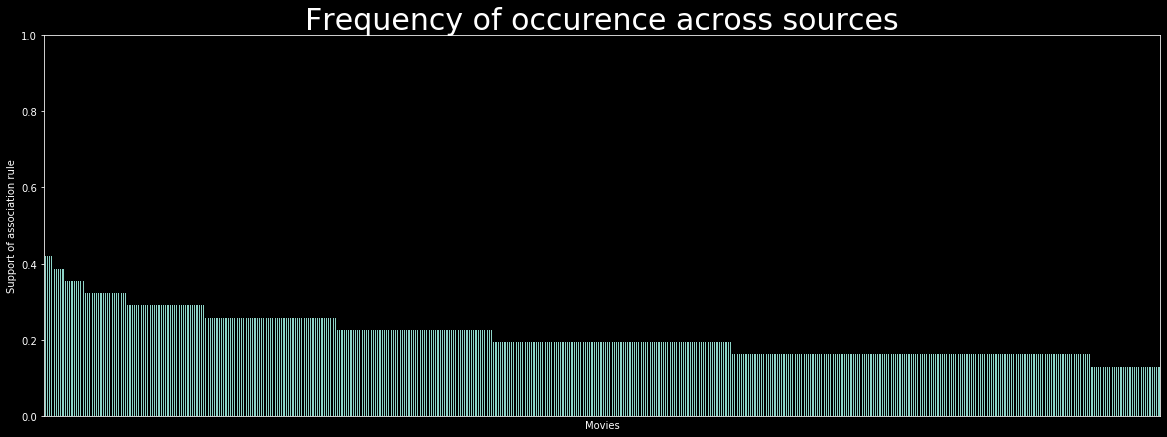

In [95]:
plt.style.use('dark_background')
s_support.sort_values(ascending=False).head(500).plot.bar(figsize=(20,7))
plt.title('Frequency of occurence across sources', fontsize = 30, fontweight = 20)
plt.xlabel('Movies')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Support of association rule')
plt.ylim((0, 1))
plt.show()

Step shape of the long tail suggests that some movies are bundles together and sold to the exact same amount of sources

In [127]:
bundle = df[df['Mama_id']==37211]
bundle

,Movie_id,Mama_id,Title,Country_of_origin,Country_of_market,Royalties,Date,Source,source_country,origin_to_market
2760952,4639,37211,Nicht mein Tag,DE,Canada,6.98,2017-07-10,itunes,itunes Canada,DE to Canada
2760953,4639,37211,Nicht mein Tag,DE,Canada,3.49,2017-07-12,itunes,itunes Canada,DE to Canada
2760954,4639,37211,Nicht mein Tag,DE,Canada,7.68,2017-07-14,itunes,itunes Canada,DE to Canada
2760955,4639,37211,Nicht mein Tag,DE,Canada,4.19,2017-07-15,itunes,itunes Canada,DE to Canada
2760956,4639,37211,Nicht mein Tag,DE,Canada,4.19,2017-07-20,itunes,itunes Canada,DE to Canada
...,...,...,...,...,...,...,...,...,...,...
2762070,4639,37211,Nicht mein Tag,DE,United States,15.00,2019-12-15,kanopy,kanopy United States,DE to United States
2762071,4639,37211,Nicht mein Tag,DE,United States,15.00,2019-12-22,kanopy,kanopy United States,DE to United States
2762072,4639,37211,Nicht mein Tag,DE,United States,3.49,2019-12-24,itunes,itunes United States,DE to United States
2762073,4639,37211,Nicht mein Tag,DE,United States,1.00,2020-01-04,hoopla,hoopla United States,DE to United States


In [115]:
s_support

38179    0.419355
37211    0.419355
37220    0.419355
35838    0.419355
35803    0.387097
           ...   
2485     0.032258
32262    0.032258
2534     0.032258
2511     0.032258
31774    0.032258
Name: 0, Length: 6015, dtype: float64

In [89]:
c_count = [y for x in c_portfolio.tolist() for y in x]
c_count = pd.DataFrame(c_count)[0].value_counts()

In [90]:
c_support = c_count/len(c_portfolio)

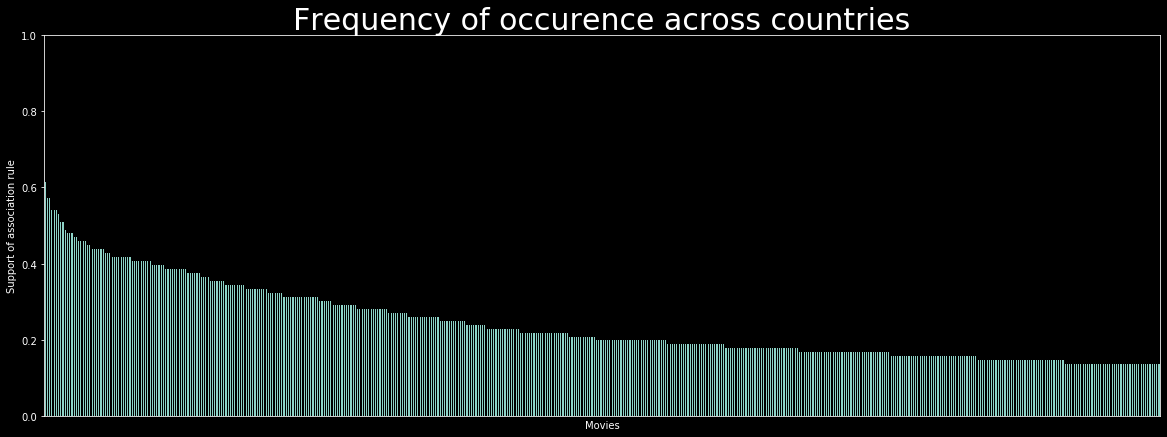

In [102]:
plt.style.use('dark_background')
c_support.sort_values(ascending=False).head(500).plot.bar(figsize=(20,7))
plt.title('Frequency of occurence across countries', fontsize = 30, fontweight = 20)
plt.xlabel('Movies')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Support of association rule')
plt.ylim((0, 1))
plt.show()

In [92]:
c_support

32154    0.614583
453      0.572917
12374    0.572917
1459     0.541667
32667    0.541667
           ...   
153      0.010417
38486    0.010417
2303     0.010417
32331    0.010417
1334     0.010417
Name: 0, Length: 6015, dtype: float64

In [82]:
sc_count = [y for x in sc_portfolio.tolist() for y in x]
sc_count = pd.DataFrame(sc_count)[0].value_counts()

In [83]:
sc_support = sc_count/len(sc_portfolio)

In [84]:
sc_support

32154    0.434615
32667    0.334615
35711    0.311538
35894    0.303846
38419    0.303846
           ...   
38113    0.003846
43502    0.003846
38049    0.003846
2411     0.003846
42799    0.003846
Name: 0, Length: 6015, dtype: float64

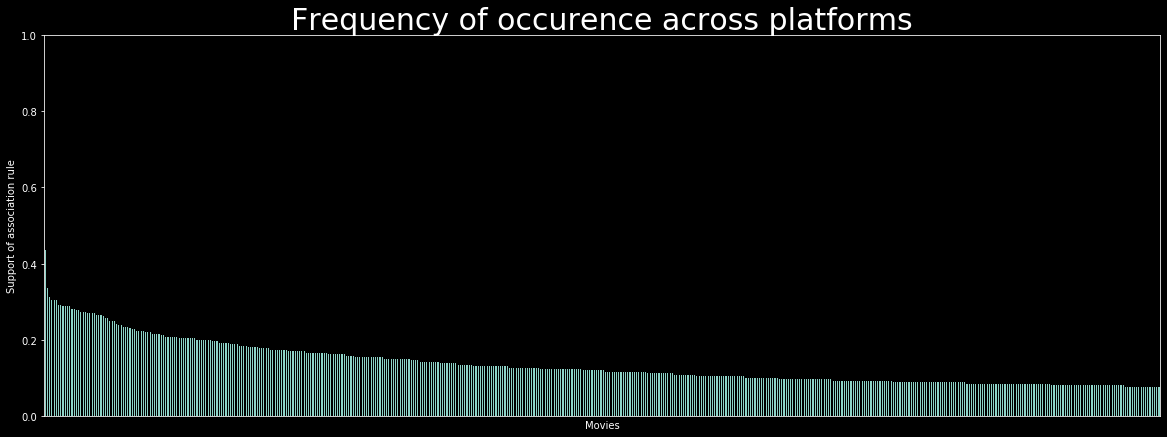

In [103]:
plt.style.use('dark_background')
sc_support.sort_values(ascending=False).head(500).plot.bar(figsize=(20,7))
plt.title('Frequency of occurence across platforms', fontsize = 30, fontweight = 20)
plt.xlabel('Movies')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Support of association rule')
plt.ylim((0, 1))
plt.show()

In [129]:
otm_count

32154    59
12374    55
453      55
32667    52
1859     52
         ..
43694     1
1748      1
37561     1
1716      1
2031      1
Name: 0, Length: 6015, dtype: int64

In [176]:
otm_count = [y for x in otm_portfolio.tolist() for y in x]
otm_count = pd.DataFrame(otm_count)[0].value_counts()

In [177]:
otm_support = otm_count/len(otm_portfolio)

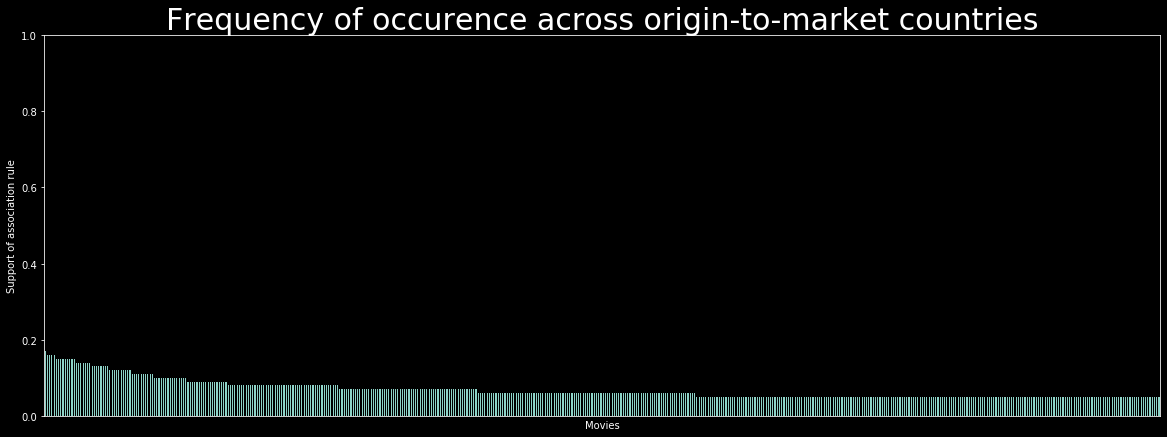

In [178]:
plt.style.use('dark_background')
otm_support.sort_values(ascending=False).head(500).plot.bar(figsize=(20,7))
plt.title('Frequency of occurence across origin-to-market countries', fontsize = 30, fontweight = 20)
plt.xlabel('Movies')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Support of association rule')
plt.ylim((0, 1))
plt.show()

In [179]:
otm_support

36348    0.17
38410    0.16
44060    0.16
38404    0.16
1810     0.16
         ... 
35485    0.01
668      0.01
43673    0.01
660      0.01
44       0.01
Name: 0, Length: 4842, dtype: float64

In [180]:
# Sanity check

df[df['Mama_id']==36348]

,Movie_id,Mama_id,Title,Country_of_origin,Country_of_market,Royalties,Date,Source,source_country,origin_to_market
2734127,4569,36348,Je ne suis pas un salaud,FR,Argentina,1.40,2017-01-13,itunes,itunes Argentina,FR to Argentina
2734128,4569,36348,Je ne suis pas un salaud,FR,Argentina,2.07,2017-01-14,itunes,itunes Argentina,FR to Argentina
2734129,4569,36348,Je ne suis pas un salaud,FR,Argentina,1.40,2017-01-15,itunes,itunes Argentina,FR to Argentina
2734130,4569,36348,Je ne suis pas un salaud,FR,Argentina,1.40,2017-01-24,itunes,itunes Argentina,FR to Argentina
2734131,4569,36348,Je ne suis pas un salaud,FR,Argentina,1.40,2017-01-25,itunes,itunes Argentina,FR to Argentina
...,...,...,...,...,...,...,...,...,...,...
2735574,4569,36348,Je ne suis pas un salaud,FR,United States,-5.00,2019-02-11,amazon,amazon United States,FR to United States
2735575,4569,36348,Je ne suis pas un salaud,FR,United States,2.00,2019-03-19,amazon,amazon United States,FR to United States
2735576,4569,36348,Je ne suis pas un salaud,FR,United States,1.50,2019-04-14,amazon,amazon United States,FR to United States
2735577,4569,36348,Je ne suis pas un salaud,FR,United States,2.00,2019-05-03,amazon,amazon United States,FR to United States


The computation of the support is biased for this portfolio category since a movie cannot be from two countries, yet the denominator is still on the top 100 otm portfolios. Needs improvement.

# Step 2: Constructing tag-based similarity

Once we mining the strongest association rules between movies, we need to recommend movies to relevant portfolios.

In [181]:
tags = pd.read_csv('tags_clean.csv',sep=',')

In [182]:
tags = tags.rename(columns={"id": "Mama_id"})

In [183]:
tags = tags.reset_index().set_index('Mama_id')

In [184]:
tag_list = tags.columns.values.tolist()

In [186]:
len(tag_list)

729

,Title,Movie_id,Royalties,index_x,installation art_x,superheroes_x,Irish conflicts_x,1990s_x,spies_x,psychological abuse_x,...,frenemies_y,hot pursuits_y,live concerts_y,in the skies_y,zombies_y,climbing_y,American Revolutionary War_y,looking for a parent_y,bars and restaurants_y,Western United States_y
Mama_id,,,,,,,,,,,,,,,,,,,,,
1,The Spanish Prisoner,1004,2183.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Food, Inc.",2229,2912.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,He Got Game,2215,2298.68,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,L'affaire Tournesol,5778,4268.06,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Le bal des menteurs,6195,4659.09,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42705,Chce sie zyc,312171,157.11,3274.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42771,The Case for Christ,2622016,7291.43,3278.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42811,Voyoucratie,1499984,2518.94,3279.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [263]:
df.groupby('Country_of_market')['Royalties'].mean().sort_values(ascending = False).head(30)

Country_of_market
Indonesia                    54040.720161
Viet Nam                     34541.481399
Colombia                      6796.955871
Chile                         2760.260602
Japan                          511.069732
Hungary                        375.161004
Taiwan, Province of China      162.680078
Russian Federation             145.275899
Mexico                         136.977311
Philippines                    110.665812
Norway                         107.876944
Sweden                         104.053432
Denmark                         96.103393
Thailand                        81.430274
Hong Kong                       53.700364
South Africa                    39.032639
Czech Republic                  35.821497
Israel                          20.508519
Brazil                          17.067450
Peru                            10.829633
Singapore                       10.380447
Malaysia                        10.059596
Spain                            9.397947
Italy           

In [124]:
it_fr = df[df['source_country']=='itunesFrance']

In [125]:
it_fr = it_fr.groupby(['Mama_id','Title']).sum()

In [126]:
it_fr = it_fr.reset_index().set_index('Mama_id')

In [131]:
it_fr = it_fr.merge(tags,left_index=True, right_index=True, how='left').dropna()

In [264]:
it_fr

,Title,Movie_id,Royalties,index_x,installation art_x,superheroes_x,Irish conflicts_x,1990s_x,spies_x,psychological abuse_x,...,frenemies_y,hot pursuits_y,live concerts_y,in the skies_y,zombies_y,climbing_y,American Revolutionary War_y,looking for a parent_y,bars and restaurants_y,Western United States_y
Mama_id,,,,,,,,,,,,,,,,,,,,,
1,The Spanish Prisoner,1004,2183.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Food, Inc.",2229,2912.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,He Got Game,2215,2298.68,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,L'affaire Tournesol,5778,4268.06,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Le bal des menteurs,6195,4659.09,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42705,Chce sie zyc,312171,157.11,3274.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42771,The Case for Christ,2622016,7291.43,3278.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42811,Voyoucratie,1499984,2518.94,3279.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df.head()

,Movie_id,Mama_id,Title,Country_of_origin,Country_of_market,Royalties,Date,Source,source_country
3183,2,1,The Spanish Prisoner,US,France,20.2,2011-08-15,itunes,itunesFrance
3184,2,1,The Spanish Prisoner,US,France,20.2,2011-08-16,itunes,itunesFrance
3185,2,1,The Spanish Prisoner,US,France,12.7,2011-08-17,itunes,itunesFrance
3186,2,1,The Spanish Prisoner,US,France,12.7,2011-08-18,itunes,itunesFrance
3187,2,1,The Spanish Prisoner,US,France,5.2,2011-08-19,itunes,itunesFrance


In [ ]:
df.hea